# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [ ]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [11]:
# list to hold Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, 
    # Country, Date
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
date= []
index = [0]
found_cities = []

# set count 
count = 1


url = "http://api.openweathermap.org/data/2.5/weather?"

In [12]:
# loop through each city 
print("Beginning Data Retriveal\n------------------------")
for c in cities: 
    query = url + "appid=" + weather_api_key + "&q=" + c + "&units=imperial"
    response = requests.get(query).json()
    time.sleep(0.5)
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(c)
        print(f"Processing Record {count}| {c}")
        
    except: 
        
        print(f"{c} is not found. Skipping...")
        pass
    count += 1
print("------------------------\nData Retreival Complete\n------------------------")

Beginning Data Retriveal
------------------------
mergui is not found. Skipping...
Processing Record 2| bredasdorp
Processing Record 3| esperance
Processing Record 4| la vergne
Processing Record 5| bayangol
Processing Record 6| west wendover
Processing Record 7| ribeira grande
Processing Record 8| hobart
Processing Record 9| garissa
ondorhaan is not found. Skipping...
Processing Record 11| eyl
Processing Record 12| juneau
Processing Record 13| coahuayana
Processing Record 14| puerto ayora
samusu is not found. Skipping...
Processing Record 16| kovur
Processing Record 17| hasaki
barentsburg is not found. Skipping...
Processing Record 19| hofn
Processing Record 20| east london
Processing Record 21| new norfolk
Processing Record 22| kodiak
Processing Record 23| victoria
Processing Record 24| portland
Processing Record 25| provideniya
Processing Record 26| meulaboh
Processing Record 27| marsh harbour
Processing Record 28| longyearbyen
Processing Record 29| bluff
Processing Record 30| nanort

Processing Record 253| hambantota
Processing Record 254| nanao
Processing Record 255| macusani
Processing Record 256| rocha
Processing Record 257| okha
Processing Record 258| amahai
Processing Record 259| jacareacanga
Processing Record 260| concordia
Processing Record 261| nalut
Processing Record 262| virginia beach
Processing Record 263| cabo san lucas
Processing Record 264| fortuna
Processing Record 265| kendari
Processing Record 266| hervey bay
Processing Record 267| juba
Processing Record 268| parobe
Processing Record 269| qobustan
Processing Record 270| vammala
Processing Record 271| gayny
Processing Record 272| half moon bay
Processing Record 273| nabire
Processing Record 274| fethiye
Processing Record 275| waddan
Processing Record 276| ayagoz
Processing Record 277| bismil
Processing Record 278| menongue
Processing Record 279| petropavlovsk-kamchatskiy
Processing Record 280| camacha
Processing Record 281| nizhniy kuranakh
Processing Record 282| puerto madryn
Processing Record 283

Processing Record 506| flinders
Processing Record 507| wawa
Processing Record 508| lumeje
Processing Record 509| sullana
chagda is not found. Skipping...
Processing Record 511| boende
Processing Record 512| ugoofaaru
babanusah is not found. Skipping...
Processing Record 514| verkhnevilyuysk
Processing Record 515| olenino
Processing Record 516| yerbogachen
Processing Record 517| carnduff
Processing Record 518| lamar
Processing Record 519| weligama
Processing Record 520| sao paulo de olivenca
Processing Record 521| maceio
Processing Record 522| tokoroa
Processing Record 523| kaihua
Processing Record 524| nikolayevsk-na-amure
Processing Record 525| pangody
sahrak is not found. Skipping...
Processing Record 527| atasu
Processing Record 528| kangalassy
Processing Record 529| manturovo
Processing Record 530| mwense
Processing Record 531| vedeno
Processing Record 532| nishihara
Processing Record 533| lasa
Processing Record 534| lunenburg
Processing Record 535| sligo
Processing Record 536| niq

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
cityDataDF = pd.DataFrame(
    {
    "City": found_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": windSpeed,
    "Country": country,
    "Date": date
    }
)


In [21]:
cityDataDF = pd.DataFrame(cityDataDF)
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,58.28,88,73,2.30,ZA,1635625527
1,esperance,-33.8667,121.9000,53.44,70,6,14.97,AU,1635625563
2,la vergne,36.0156,-86.5819,55.81,93,90,10.36,US,1635625564
3,bayangol,50.6977,103.4656,25.66,92,95,2.30,RU,1635625565
4,west wendover,40.7391,-114.0733,56.41,58,1,6.91,US,1635625566


In [24]:
cityDataDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,18.728902,17.625059,60.120053,73.195079,57.678383,7.360633,1.635626e+09
std,33.417498,90.552897,21.668959,20.046396,39.531770,5.374208,1.745777e+02
min,-54.800000,-175.200000,-12.820000,11.000000,0.000000,0.000000,1.635625e+09
25%,-9.372700,-65.102300,46.690000,64.000000,18.000000,3.310000,1.635626e+09
50%,22.285500,20.647300,64.720000,77.000000,75.000000,6.150000,1.635626e+09
75%,46.433300,100.354300,77.040000,88.000000,98.000000,9.930000,1.635626e+09
max,78.218600,179.316700,101.530000,100.000000,100.000000,32.210000,1.635626e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.

dirty_cityDataDF = cityDataDF[(cityDataDF["Humidity"] > 100)].index
print(dirty_cityDataDF)

Int64Index([], dtype='int64')


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_cityDataDF = cityDataDF.drop(dirty_cityDataDF, inplace=False)
clean_cityDataDF.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,58.28,88,73,2.30,ZA,1635625527
1,esperance,-33.8667,121.9000,53.44,70,6,14.97,AU,1635625563
2,la vergne,36.0156,-86.5819,55.81,93,90,10.36,US,1635625564
3,bayangol,50.6977,103.4656,25.66,92,95,2.30,RU,1635625565
4,west wendover,40.7391,-114.0733,56.41,58,1,6.91,US,1635625566


In [37]:
# Extract relevant fields from the data frame

Lat = clean_cityDataDF["Lat"]
Max_temps = clean_cityDataDF["Max Temp"]
Humidity = clean_cityDataDF["Humidity"]
Cloudiness = clean_cityDataDF["Cloudiness"]
Wind_Speed = clean_cityDataDF["Wind Speed"]
    
# Export the city data into a csv
clean_cityDataDF.to_csv(output_data_file, index_label="City_ID")
    


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

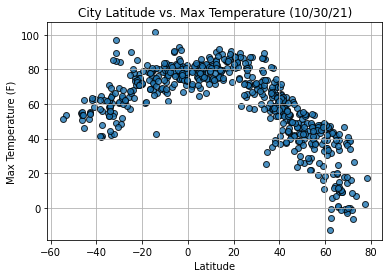

In [44]:
# create scatter plot of city latitude vs Max Temperature

plt.scatter(Lat, Max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)
plt.savefig("Output_data/Fig1.png")
# show plot
plt.show()

## Latitude vs. Humidity Plot

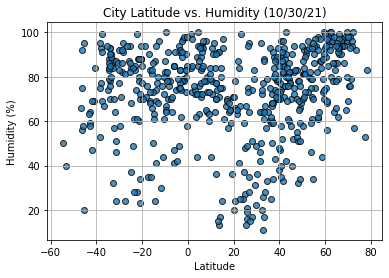

In [45]:
# create scatter plot of city latitude vs Max Temperature

plt.scatter(Lat, Humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)
plt.savefig("Output_data/Fig2.png")
# show plot
plt.show()

## Latitude vs. Cloudiness Plot

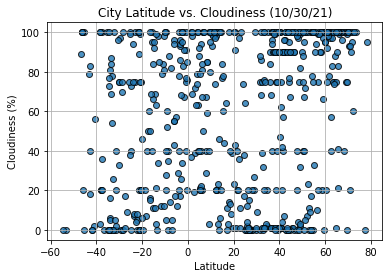

In [47]:
# create scatter plot of city latitude vs Max Temperature

plt.scatter(Lat, Cloudiness, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)
plt.savefig("Output_data/Fig3.png")
# show plot
plt.show()

## Latitude vs. Wind Speed Plot

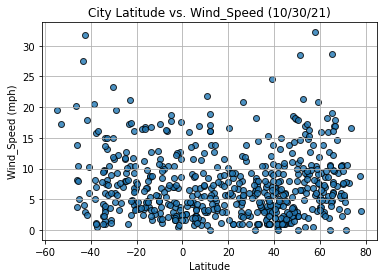

In [48]:
# create scatter plot of city latitude vs Max Temperature

plt.scatter(Lat, Wind_Speed, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.title("City Latitude vs. Wind_Speed (%s)" % time.strftime("%x"))
plt.grid(True)
plt.savefig("Output_data/Fig4.png")
# show plot
plt.show()

## Linear Regression

In [96]:
# create a function to create linear regression plots
def plot_linear_regression(x_values, y_values, titles, text_coordinates):
    # run a regression on the hemisphere
    (slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq =  "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # create plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    print(f" The r-values is: {rvalues**2}")
    plt.show()




In [97]:
# new DataFrames for Northern and Southern Hemisphere
northHemisphereDF = clean_cityDataDF.loc[clean_cityDataDF["Lat"] >= 0]
southHemisphereDF = clean_cityDataDF.loc[clean_cityDataDF["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-values is: 0.7350974445071229


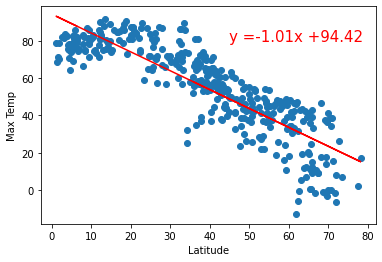

In [98]:
# Linear regression on Northern Hemisphere
x_values = northHemisphereDF["Lat"]
y_values = northHemisphereDF["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (45,80))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-values is: 0.4691866289203054


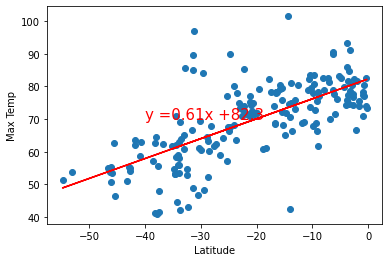

In [99]:
# Linear regression on Northern Hemisphere
x_values = southHemisphereDF["Lat"]
y_values = southHemisphereDF["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-40,70))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-values is: 0.06181024532589776


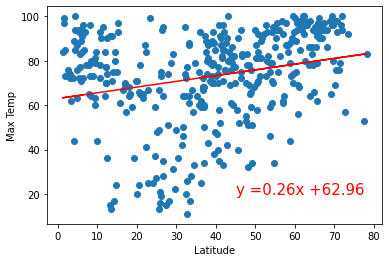

In [102]:
# Linear regression on Northern Hemisphere
x_values = northHemisphereDF["Lat"]
y_values = northHemisphereDF["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-values is: 0.012792749977992669


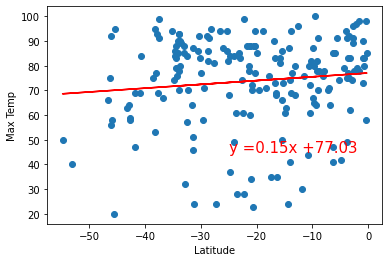

In [103]:
# Linear regression on Northern Hemisphere
x_values = southHemisphereDF["Lat"]
y_values = southHemisphereDF["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,45))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-values is: 0.045253730130608544


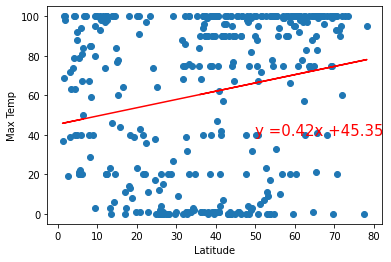

In [104]:
# Linear regression on Northern Hemisphere
x_values = northHemisphereDF["Lat"]
y_values = northHemisphereDF["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (50,40))

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-values is: 0.035544489940227686


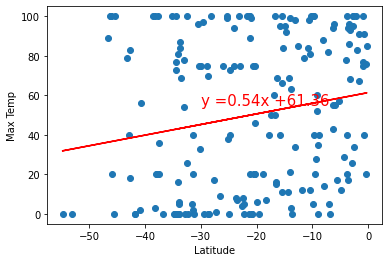

In [106]:
# Linear regression on Northern Hemisphere
x_values = southHemisphereDF["Lat"]
y_values = southHemisphereDF["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,55))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-values is: 0.029344158208739934


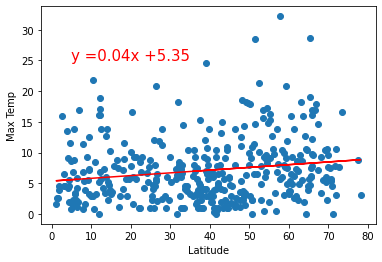

In [107]:
# Linear regression on Northern Hemisphere
x_values = northHemisphereDF["Lat"]
y_values = northHemisphereDF["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-values is: 0.035544489940227686


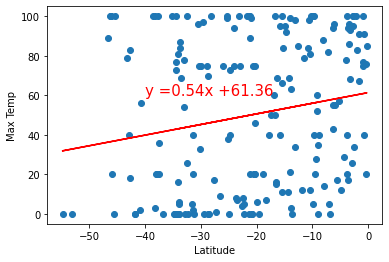

In [108]:
# Linear regression on Northern Hemisphere
x_values = southHemisphereDF["Lat"]
y_values = southHemisphereDF["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-40,60))